# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.8 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy as accuracy_metric
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-13 22:34:58--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-13 22:34:58--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccddb7b0a6653ed8f9ad1342461.dl.dropboxusercontent.com/cd/0/get/CHeJR8y9rS1aOOhgevzCW5-6L_tdT_ywRxRp5G98oNCkrU-cAG6V3O7WL52qJ6jeovTsaCqJcNZpH8WWSbMZg7TvB79IhlXww9hdpYTDtaHmvCLHvh7IvZDw67WAzY3mDcookBQKmRLqq80eR36_jfsU/file?dl=1# [following]
--2023-11-13 22:34:59--  https://uccddb7b0a6653ed8f9ad1342461.dl.dropboxusercontent.com/cd/0/get/CHeJR8y9rS1aOOhgevzCW5-6L_tdT_ywRxRp5G98oNCkrU-cAG6V3O7WL52qJ6jeovTsaCqJcNZpH8WWSbMZg7TvB79IhlXww9hdpYT

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
import torchvision.transforms.v2 as v2
train_transform = v2.Compose(
    [
        v2.RandomAutocontrast(p = 0.5),
        v2.RandomHorizontalFlip(p = 0.4),
        v2.RandomVerticalFlip(p = 0.4),
        v2.RandomInvert(p = 0.1 ),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
    ]
)
val_transform = v2.Compose(
    [
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 256, shuffle = False)

In [ ]:
# https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html
def batch_mean_and_sd(loader):

    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (
                      cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (
                            cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(
      snd_moment - fst_moment ** 2)
    return mean,std

mean, std = batch_mean_and_sd(train_dataloader)
mean, std

(tensor([0.4840, 0.4610, 0.4238]), tensor([0.2781, 0.2732, 0.2901]))

In [ ]:
import torchvision.transforms.v2 as v2
train_transform = v2.Compose(
    [
        v2.RandomAutocontrast(p = 0.5),
        v2.RandomHorizontalFlip(p = 0.4),
        v2.RandomVerticalFlip(p = 0.4),
        v2.RandomInvert(p = 0.1 ),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
        v2.Normalize(mean = [0.4840, 0.4610, 0.4238], std =  [0.2781, 0.2732, 0.2901]),
    ]
)
val_transform = v2.Compose(
    [
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
        v2.Normalize(mean = [0.4840, 0.4610, 0.4238], std =  [0.2781, 0.2732, 0.2901]),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 256, shuffle = False)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

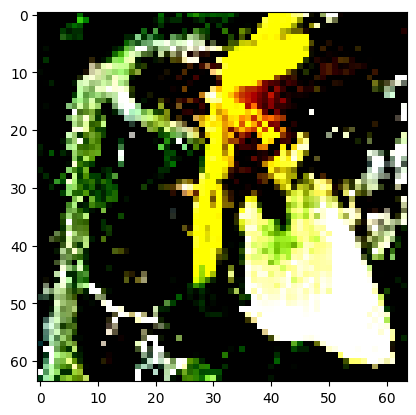

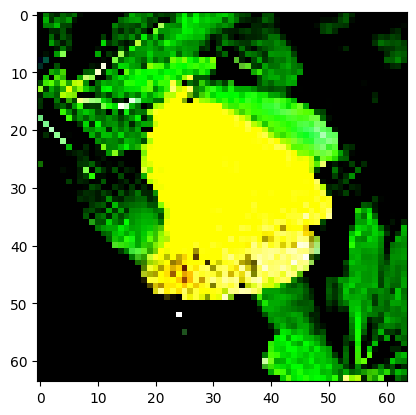

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.batchnorm1 = torch.nn.BatchNorm2d(3) # 3 channels?
        self.leakyrelu = torch.nn.LeakyReLU()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding=1),
            self.leakyrelu,
            torch.nn.MaxPool2d(kernel_size = 3)
        )
        self.batchnorm2 = torch.nn.BatchNorm2d(32)
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            self.leakyrelu,
            torch.nn.MaxPool2d(kernel_size = 3)
        )
        #to 128 and back?
        self.linear1 = torch.nn.Linear(in_features = 64 * 7 * 7,out_features= 512)
        self.linear2 = torch.nn.Linear(in_features = 512, out_features = 256)
        self.linear3 = torch.nn.Linear(in_features = 256, out_features = 200)
        self.dropout = torch.nn.Dropout(0.4)

        self.targets_val = torch.Tensor()
        self.preds_val = torch.Tensor()

        self.targets_train = torch.Tensor()
        self.preds_train = torch.Tensor()
    def forward(self, x, flag = False, target = None):
        x = self.batchnorm1(x)
        x = self.conv1(x)
        x = self.batchnorm2(x)
        x = self.conv2(x)
        x = x.view(x.size(0),-1)
        x = self.leakyrelu(self.linear1(x))
        x = self.dropout(x)
        x = self.leakyrelu(self.linear2(x))
        output = self.linear3(x)

        if target is not None:
            if flag == 'val':
              self.targets_val = torch.cat((self.targets_val, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_val = torch.cat((self.preds_val, pred.cpu()), 0)
              self.accuracy_val = accuracy_metric(self.preds_val.long(), self.targets_val.long(), task='multiclass', num_classes=200)

            elif flag == 'train':
              self.targets_train = torch.cat((self.targets_train, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_train = torch.cat((self.preds_train, pred.cpu()), 0)
              self.accuracy_train = accuracy_metric(self.preds_train.long(), self.targets_train.long(), task='multiclass', num_classes=200)
        return output

    def get_accuracy(self, flag = 'val', reset=False):
        print(self.targets_val.shape,self.preds_val.shape,self.targets_train.shape,self.preds_train.shape)
        # return accuracy by all values till now
        if reset and flag == 'val':
            self.targets_val = torch.Tensor()
            self.preds_val = torch.Tensor()
            return self.accuracy_val
        else:
            self.targets_train = torch.Tensor()
            self.preds_train = torch.Tensor()
            return self.accuracy_train

### Тренировочный класс lightning

In [ ]:
from torchmetrics import Accuracy
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.lr = learning_rate
        self.loss_func = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate
    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(),lr = self.learning_rate)
        scheduler = {
            'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True),
            'monitor': 'loss_val',
            'interval': 'epoch',
            'frequency': 1
        }
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}


    def training_step(self, train_batch, batch_idx):
        img, target = train_batch
        predict = self.model(img,'train',target)
        loss = self.loss_func(predict,target)
        self.log("loss_train", loss,  on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        img, target = val_batch
        predict = self.model(img,'val',target)
        loss = self.loss_func(predict,target)
        self.log("loss_val", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return loss


    def on_train_epoch_end(self):
        self.log("accuracy_train", self.model.get_accuracy(flag = 'train', reset = True), prog_bar=True, logger=True)
        self.log("accuracy_val", self.model.get_accuracy(flag = 'val', reset = True), prog_bar=True, logger=True)

        #https://lightning.ai/docs/pytorch/stable/common/optimization.html
        sch = self.lr_schedulers()
        print(sch)
        # If the selected scheduler is a ReduceLROnPlateau scheduler.
        if isinstance(sch, torch.optim.lr_scheduler.ReduceLROnPlateau):
            sch.step(self.trainer.callback_metrics["loss_val"])

In [7]:
from pytorch_lightning.callbacks import ModelCheckpoint
def experiment(module,train_dataloader,val_dataloader,epochs = 10):
    wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
    checkpoint_callback = ModelCheckpoint(monitor="accuracy_val", mode="max")
    wandb.init(project='hw_iad_dl2')
    trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator = 'auto',
    max_epochs=epochs,
    callbacks=[checkpoint_callback]
    )
    trainer.fit(module,train_dataloader,val_dataloader)
    wandb.finish()

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model,1e-3)

NameError: ignored

In [ ]:
experiment(module,train_dataloader,val_dataloader)

wandb: Currently logged in as: metobtw. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | YourNet            | 1.8 M 
1 | loss_func | CrossEntropyLoss   | 0     
2 | accuracy  | MulticlassAccuracy | 0     
-------------------------------------------------


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10512]) torch.Size([10512]) torch.Size([100000]) torch.Size([100000])
torch.Size([10512]) torch.Size([10512]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


accuracy_train,▁▃▅▅▆▆▇▇██
accuracy_val,▁▄▅▆▆▆▇▇██
epoch,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
loss_train,█▅▄▃▃▂▂▁▁▁
loss_val,█▅▄▃▃▂▂▂▁▁
trainer/global_step,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
accuracy_train,0.22449
accuracy_val,0.2583
epoch,9
loss_train,3.39828
loss_val,3.2739


### Валидация результатов задания

In [8]:
import torchmetrics
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_num = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            pred = model(images)
            pred = torch.argmax(pred, dim=-1)
            #acc_batch = model.get_accuracy(pred,labels)
            acc_batch = torchmetrics.functional.accuracy(pred.long(), labels.long(), task='multiclass', num_classes=200)
        accuracy_num += acc_batch
    accuracy_num = accuracy_num / len(test_dataloader)
    return accuracy_num

In [ ]:
class ImportNet_Dense(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.densenet169(pretrained = False)
        self.model.classifier = nn.Linear(in_features=1664, out_features=200, bias=True)

        self.targets_val = torch.Tensor()
        self.preds_val = torch.Tensor()

        self.targets_train = torch.Tensor()
        self.preds_train = torch.Tensor()

    def forward(self, x,flag = False, target = None):
        output = self.model(x)
        if target is not None:
            if flag == 'val':
              self.targets_val = torch.cat((self.targets_val, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_val = torch.cat((self.preds_val, pred.cpu()), 0)
              self.accuracy_val = accuracy_metric(self.preds_val.long(), self.targets_val.long(), task='multiclass', num_classes=200)

            elif flag == 'train':
              self.targets_train = torch.cat((self.targets_train, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_train = torch.cat((self.preds_train, pred.cpu()), 0)
              self.accuracy_train = accuracy_metric(self.preds_train.long(), self.targets_train.long(), task='multiclass', num_classes=200)
        return output

    def get_accuracy(self, flag = 'val', reset=False):
        print(self.targets_val.shape,self.preds_val.shape,self.targets_train.shape,self.preds_train.shape)
        # return accuracy by all values till now
        if reset and flag == 'val':
            self.targets_val = torch.Tensor()
            self.preds_val = torch.Tensor()
            return self.accuracy_val
        else:
            self.targets_train = torch.Tensor()
            self.preds_train = torch.Tensor()
            return self.accuracy_train

In [ ]:
model_import_dense = ImportNet_Dense().to(device)
module_imp_dense = YourModule(model_import_dense,2e-3)
experiment(module_imp_dense,train_dataloader,val_dataloader,20)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ImportNet_Dense  | 12.8 M
1 | loss_func | CrossEntropyLoss | 0     
-----------------------------------------------
12.8 M    Trainable params
0         Non-trainable params
12.8 M    Total params
51.270    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10512]) torch.Size([10512]) torch.Size([100000]) torch.Size([100000])
torch.Size([10512]) torch.Size([10512]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00020: reducing learning rate of group 0 to 1.0000e-03.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00024: reducing learning rate of group 0 to 5.0000e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00027: reducing learning rate of group 0 to 2.5000e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00030: reducing learning rate of group 0 to 1.2500e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00033: reducing learning rate of group 0 to 6.2500e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00036: reducing learning rate of group 0 to 3.1250e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00039: reducing learning rate of group 0 to 1.5625e-05.


accuracy_train,▁▂▂▃▃▄▄▄▅▄▅▆▇▇▇█████
accuracy_val,▁▃▄▅▅▆▇▇▇▇██████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
loss_train,█▇▆▅▅▅▄▄▄▄▃▃▂▂▁▁▁▁▁▁
loss_val,█▇▄▃▃▂▂▂▁▂▁▂▂▂▂▂▃▃▃▃
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
accuracy_train,0.89524
accuracy_val,0.4419
epoch,19
loss_train,0.44827
loss_val,2.8187


In [ ]:
accuracy = evaluate_task(model_import_dense, val_dataloader)

print(f"Оценка за это задание составит {np.clip(10 * accuracy.cpu() / 0.44, 0, 10):.2f} баллов")


100%|██████████| 40/40 [00:14<00:00,  2.80it/s]

Оценка за это задание составит 10.00 баллов


In [ ]:
from pathlib import Path
# https://docs.wandb.ai/guides/integrations/lightning
checkpoint_reference = "metobtw/hw_iad_dl2/model-h9aat672:v13"
run = wandb.init(project="hw_iad_dl2")
artifact = run.use_artifact(checkpoint_reference, type="model")
artifact_dir = artifact.download()
model = YourModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", model = ImportNet_Dense().to(device), learning_rate = 2e-3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
accuracy = evaluate_task(model, val_dataloader)

print(f"Оценка за это задание составит {np.clip(10 * accuracy.cpu() / 0.44, 0, 10):.2f} баллов")


100%|██████████| 40/40 [00:14<00:00,  2.77it/s]

Оценка за это задание составит 10.00 баллов


In [ ]:
accuracy

tensor(0.4509, device='cuda:0')

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
import torchvision.transforms.v2 as v2
train_transform = v2.Compose(
    [   v2.Resize(256),
        v2.RandomAutocontrast(p = 0.5),
        v2.RandomHorizontalFlip(p = 0.4),
        v2.RandomVerticalFlip(p = 0.4),
        v2.RandomInvert(p = 0.1 ),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
        v2.Normalize(mean = [0.4840, 0.4610, 0.4238], std =  [0.2781, 0.2732, 0.2901]),
    ]
)
val_transform = v2.Compose(
    [   v2.Resize(256),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
        v2.Normalize(mean = [0.4840, 0.4610, 0.4238], std =  [0.2781, 0.2732, 0.2901]),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 256, shuffle = False)

In [ ]:
class ImportNet_Dense_pretr(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.densenet169(pretrained = True)
        for param in self.model.parameters():
          param.requires_grad = False
        self.model.classifier = nn.Linear(in_features=1664, out_features=200, bias=True)

        self.targets_val = torch.Tensor()
        self.preds_val = torch.Tensor()

        self.targets_train = torch.Tensor()
        self.preds_train = torch.Tensor()

    def forward(self, x,flag = False, target = None):
        output = self.model(x)
        if target is not None:
            if flag == 'val':
              self.targets_val = torch.cat((self.targets_val, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_val = torch.cat((self.preds_val, pred.cpu()), 0)
              self.accuracy_val = accuracy_metric(self.preds_val.long(), self.targets_val.long(), task='multiclass', num_classes=200)

            elif flag == 'train':
              self.targets_train = torch.cat((self.targets_train, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_train = torch.cat((self.preds_train, pred.cpu()), 0)
              self.accuracy_train = accuracy_metric(self.preds_train.long(), self.targets_train.long(), task='multiclass', num_classes=200)
        return output

    def get_accuracy(self, flag = 'val', reset=False):
        print(self.targets_val.shape,self.preds_val.shape,self.targets_train.shape,self.preds_train.shape)
        # return accuracy by all values till now
        if reset and flag == 'val':
            self.targets_val = torch.Tensor()
            self.preds_val = torch.Tensor()
            return self.accuracy_val
        else:
            self.targets_train = torch.Tensor()
            self.preds_train = torch.Tensor()
            return self.accuracy_train

### Тренировочный класс lightning

In [9]:
from torchmetrics import Accuracy
class YourModule_pretr(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.lr = learning_rate
        self.loss_func = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate
    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(),lr = self.learning_rate)
        scheduler = {
            'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True),
            'monitor': 'loss_val',
            'interval': 'epoch',
            'frequency': 1
        }
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}


    def training_step(self, train_batch, batch_idx):
        img, target = train_batch
        predict = self.model(img,'train',target)
        loss = self.loss_func(predict,target)
        self.log("loss_train", loss,  on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        img, target = val_batch
        predict = self.model(img,'val',target)
        loss = self.loss_func(predict,target)
        self.log("loss_val", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return loss


    def on_train_epoch_end(self):
        self.log("accuracy_train", self.model.get_accuracy(flag = 'train', reset = True), prog_bar=True, logger=True)
        self.log("accuracy_val", self.model.get_accuracy(flag = 'val', reset = True), prog_bar=True, logger=True)

        #https://lightning.ai/docs/pytorch/stable/common/optimization.html
        sch = self.lr_schedulers()
        print(sch)
        # If the selected scheduler is a ReduceLROnPlateau scheduler.
        if isinstance(sch, torch.optim.lr_scheduler.ReduceLROnPlateau):
            sch.step(self.trainer.callback_metrics["loss_val"])

In [ ]:
model_import_dense = ImportNet_Dense_pretr().to(device)
module_imp_dense = YourModule_pretr(model_import_dense,2e-3)
experiment(module_imp_dense,train_dataloader,val_dataloader,20)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                  | Params
----------------------------------------------------
0 | model     | ImportNet_Dense_pretr | 12.8 M
1 | loss_func | CrossEntropyLoss      | 0     
----------------------------------------------------
333 K     Trainable params
12

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10512]) torch.Size([10512]) torch.Size([100000]) torch.Size([100000])
torch.Size([10512]) torch.Size([10512]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00010: reducing learning rate of group 0 to 1.0000e-03.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])
Epoch 00014: reducing learning rate of group 0 to 5.0000e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


accuracy_train,▁▅▆▆▆▇▇██
accuracy_val,▁▆▆▆▆█▇██
epoch,▁▁▂▂▃▃▄▄▅▅▅▅▆▆▇▇██
loss_train,█▄▃▃▂▁▁▁▁
loss_val,█▄▄▄▄▂▂▁▁
trainer/global_step,▁▁▂▂▃▃▄▄▅▅▅▅▆▆▇▇██
accuracy_train,0.58513
accuracy_val,0.6198
epoch,8
loss_train,1.70023
loss_val,1.55347


In [10]:
class ImportNet_VisTrans_pretr(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.vit_l_32(pretrained = True)
        for param in self.model.parameters():
          param.requires_grad = False
        self.model.heads.head = nn.Linear(in_features=1024, out_features=200, bias=True)

        self.targets_val = torch.Tensor()
        self.preds_val = torch.Tensor()

        self.targets_train = torch.Tensor()
        self.preds_train = torch.Tensor()

    def forward(self, x,flag = False, target = None):
        output = self.model(x)
        if target is not None:
            if flag == 'val':
              self.targets_val = torch.cat((self.targets_val, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_val = torch.cat((self.preds_val, pred.cpu()), 0)
              self.accuracy_val = accuracy_metric(self.preds_val.long(), self.targets_val.long(), task='multiclass', num_classes=200)

            elif flag == 'train':
              self.targets_train = torch.cat((self.targets_train, target.cpu()), 0)
              pred = torch.argmax(output, dim=-1)
              self.preds_train = torch.cat((self.preds_train, pred.cpu()), 0)
              self.accuracy_train = accuracy_metric(self.preds_train.long(), self.targets_train.long(), task='multiclass', num_classes=200)
        return output

    def get_accuracy(self, flag = 'val', reset=False):
        print(self.targets_val.shape,self.preds_val.shape,self.targets_train.shape,self.preds_train.shape)
        # return accuracy by all values till now
        if reset and flag == 'val':
            self.targets_val = torch.Tensor()
            self.preds_val = torch.Tensor()
            return self.accuracy_val
        else:
            self.targets_train = torch.Tensor()
            self.preds_train = torch.Tensor()
            return self.accuracy_train

In [11]:
import torchvision.transforms.v2 as v2
train_transform = v2.Compose(
    [   v2.Resize(224),
        v2.RandomAutocontrast(p = 0.5),
        v2.RandomHorizontalFlip(p = 0.4),
        v2.RandomVerticalFlip(p = 0.4),
        v2.RandomInvert(p = 0.1 ),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
        v2.Normalize(mean = [0.4840, 0.4610, 0.4238], std =  [0.2781, 0.2732, 0.2901]),
    ]
)
val_transform = v2.Compose(
    [   v2.Resize(224),
        v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
        v2.Normalize(mean = [0.4840, 0.4610, 0.4238], std =  [0.2781, 0.2732, 0.2901]),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 256, shuffle = False)

In [12]:
model_import_dense = ImportNet_VisTrans_pretr().to(device)
module_imp_dense = YourModule_pretr(model_import_dense,2e-3)
experiment(module_imp_dense,train_dataloader,val_dataloader,2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_L_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_L_32_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_l_32-c7638314.pth" to /root/.cache/torch/hub/checkpoints/vit_l_32-c7638314.pth
100%|██████████| 1.14G/1.14G [00:12<00:00, 97.7MB/s]
wandb: Currently logged in as: metobtw. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                     | Params
-------------------------------------------------------
0 | model     | ImportNet_VisTrans_pretr | 305 M 
1 | loss_func | CrossEntropyLoss         | 0     
-------------------------------------------------------
205 K     Trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10512]) torch.Size([10512]) torch.Size([100000]) torch.Size([100000])
torch.Size([10512]) torch.Size([10512]) torch.Size([0]) torch.Size([0])


Validation: |          | 0/? [00:00<?, ?it/s]

torch.Size([10000]) torch.Size([10000]) torch.Size([100000]) torch.Size([100000])
torch.Size([10000]) torch.Size([10000]) torch.Size([0]) torch.Size([0])


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


accuracy_train,▁█
accuracy_val,▁█
epoch,▁▁██
loss_train,█▁
loss_val,█▁
trainer/global_step,▁▁██
accuracy_train,0.7511
accuracy_val,0.8686
epoch,1
loss_train,0.99341
loss_val,0.51073


### Валидация результатов задания

In [14]:
from pathlib import Path
# https://docs.wandb.ai/guides/integrations/lightning
checkpoint_reference = "metobtw/hw_iad_dl2/model-j36mn47y:v1"
run = wandb.init(project="hw_iad_dl2")
artifact = run.use_artifact(checkpoint_reference, type="model")
artifact_dir = artifact.download()
model = YourModule_pretr.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", model = ImportNet_VisTrans_pretr().to(device), learning_rate = 2e-3)

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy.cpu() - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb: Downloading large artifact model-j36mn47y:v1, 1167.90MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:2.6
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_L_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_L_32_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)

100%|██████████| 40/40 [01:52<00:00,  2.81s/it]

Оценка за это задание составит 10.00 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

https://wandb.ai/metobtw/hw_iad_dl2/reports/-2---Vmlldzo1OTY1MTcz